In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

pd.set_option('display.max_columns', None)

In [64]:
df = pd.read_csv("../raw_data/FC26_20250921.csv", low_memory=False)

In [65]:
# In-game 'boost' columns not relevant
drop_cols = df.columns[-28:-1]
df = df.drop(columns=drop_cols)

# Work rate column empty
df = df.drop(columns=['work_rate'])

In [66]:
# Numerical and Categorical features
features_columns = ['player_id', 'player_positions',
       'overall', 'potential', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [67]:
# Additional profiling features used for filtering down the line
info_columns = ['player_id', 'player_url', 'short_name', 'long_name',
       'value_eur', 'wage_eur', 'age', 'dob', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits',
       'player_face_url']

In [68]:
# Create features and info dataframes
player_features_df = df[features_columns]
player_info_df =  df[info_columns]

In [69]:
player_info_df

,player_id,player_url,short_name,long_name,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,body_type,real_face,release_clause_eur,player_tags,player_traits,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,J. Bellingham,Jude Victor William Bellingham,174500000,320000,22,2003-06-29,53.0,La Liga,1.0,243.0,Real Madrid,CAM,5.0,NaN,2023-07-01,2029.0,14,England,1318.0,CAM,10.0,Normal (170-185),Yes,370800000.0,"#Dribbler, #Playmaker , #Clinical finisher, #C...","Relentless +, Low Driven Shot, Gamechanger, In...",https://cdn.sofifa.net/players/252/371/26_120.png
1,239053,/player/239053/federico-valverde/260004/,F. Valverde,Federico Santiago Valverde Dipetta,120500000,340000,26,1998-07-22,53.0,La Liga,1.0,243.0,Real Madrid,RDM,8.0,NaN,2016-07-22,2029.0,60,Uruguay,NaN,NaN,NaN,Unique,Yes,256100000.0,"#Playmaker , #Distance shooter, #Tackling , #T...","Relentless +, Power Shot, Long Ball Pass, Inte...",https://cdn.sofifa.net/players/239/053/26_120.png
2,212622,/player/212622/joshua-kimmich/260004/,J. Kimmich,Joshua Walter Kimmich,86000000,140000,30,1995-02-08,19.0,Bundesliga,1.0,21.0,FC Bayern München,RDM,6.0,NaN,2015-07-01,2029.0,21,Germany,1337.0,RCM,6.0,Normal (170-185),Yes,141900000.0,"#Playmaker , #Crosser, #Tackling , #Complete m...","Long Ball Pass +, Finesse Shot, Whipped Pass, ...",https://cdn.sofifa.net/players/212/622/26_120.png
3,235212,/player/235212/achraf-hakimi/260004/,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,111000000,170000,26,1998-11-04,16.0,Ligue 1,1.0,73.0,Paris Saint-Germain,RB,2.0,NaN,2021-07-06,2029.0,129,Morocco,111111.0,RB,2.0,Lean (170-185),Yes,213700000.0,#Speedster,"Relentless +, Low Driven Shot, Whipped Pass, J...",https://cdn.sofifa.net/players/235/212/26_120.png
4,224232,/player/224232/nicolo-barella/260004/,N. Barella,Nicolò Barella,79500000,69000,28,1997-02-07,31.0,Serie A,1.0,44.0,Inter,RCM,23.0,NaN,2020-09-01,2029.0,27,Italy,1343.0,RCM,18.0,Normal (170-),Yes,131199999.0,#Acrobat,"Relentless +, Incisive Pass, Pinged Pass, Long...",https://cdn.sofifa.net/players/224/232/26_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,/player/267946/jun-sub-lim/260004/,Lim Jun Sub,Joon-seob Im임준섭,60000,500,21,2003-08-22,83.0,K League 1,1.0,982.0,FC Seoul,RES,25.0,NaN,2024-12-31,2030.0,167,Korea Republic,NaN,NaN,NaN,Lean (185+),No,87000.0,NaN,NaN,https://cdn.sofifa.net/players/267/946/26_120.png
18401,76593,/player/76593/jianxian-yu/260004/,Yu Jianxian,Jianxian Yu,80000,500,23,2001-11-06,2012.0,Super League,1.0,131531.0,Yunnan Yukun,SUB,24.0,NaN,2023-04-07,2027.0,155,China PR,NaN,NaN,NaN,Normal (185+),No,140000.0,NaN,NaN,https://cdn.sofifa.net/players/076/593/26_120.png
18402,77205,/player/77205/man-ho-park/260004/,Park Man Ho,Man Ho Park,90000,500,21,2004-02-28,83.0,K League 1,1.0,2056.0,Daegu FC,RES,51.0,NaN,2025-01-03,2028.0,167,Korea Republic,NaN,NaN,NaN,Normal (170-185),No,131000.0,NaN,NaN,https://cdn.sofifa.net/players/077/205/26_120.png
18403,278149,/player/278149/dipesh-chauhan/260004/,D. Chauhan,Dipesh Chauhan,110000,500,21,2003-11-20,2149.0,Super League,1.0,113040.0,NorthEast United,RES,20.0,NaN,2023-08-18,2026.0,159,India,NaN,NaN,NaN,Lean (170-185),No,171000.0,NaN,NaN,https://cdn.sofifa.net/players/278/149/26_120.png


In [70]:
# Convert player position string into list of positions
player_features_df['player_positions'] = player_features_df['player_positions'].apply(lambda x: x.split(', '))

# Take the first given position as a player's primary position (new column)
player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])

/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000gn/T/ipykernel_43540/3839546970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['player_positions'] = player_features_df['player_positions'].apply(lambda x: x.split(', '))
/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000gn/T/ipykernel_43540/3839546970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])


In [71]:
player_features_df

,player_id,player_positions,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position
0,252371,"[CAM, CM]",90,94,186,75,Right,4,4,5,80.0,86.0,83.0,90.0,78.0,85.0,66,88,75,90,77,91,73,68,89,91,81,80,83,91,83,86,85,94,80,87,85,82,91,90,74,90,77,79,77,14,11,10,5,8,NaN,CAM
1,239053,"[CM, CDM, RB]",89,90,182,74,Right,4,3,4,88.0,84.0,84.0,84.0,83.0,85.0,78,80,63,88,78,84,76,69,88,88,84,92,77,89,68,91,82,93,82,91,81,86,86,86,59,84,82,87,86,6,10,6,15,8,NaN,CM
2,212622,"[CDM, RB, CM]",89,89,177,75,Right,4,3,4,72.0,74.0,89.0,84.0,83.0,79.0,92,68,72,89,69,82,85,79,92,86,75,70,83,89,84,78,77,92,69,83,89,85,78,86,71,86,82,86,85,8,15,7,15,15,NaN,CDM
3,235212,"[RB, RM]",89,90,181,73,Right,4,4,4,92.0,79.0,82.0,83.0,82.0,79.0,85,80,71,86,74,82,78,80,73,85,89,95,81,90,78,82,84,95,72,77,77,85,84,78,68,84,82,85,79,10,8,14,6,8,NaN,RB
4,224232,[CM],87,87,175,68,Right,4,3,4,80.0,78.0,84.0,86.0,81.0,76.0,79,77,60,89,80,84,79,67,87,87,82,78,91,91,88,80,75,89,66,79,87,85,84,85,73,88,80,85,80,11,5,13,14,11,NaN,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,[GK],48,54,194,90,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,12,8,12,23,8,10,9,10,22,16,26,18,23,35,22,39,43,16,53,10,18,11,10,30,10,32,12,10,13,45,51,52,46,52,23.0,GK
18401,76593,[GK],49,56,188,77,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,10,7,11,24,7,5,12,14,17,11,17,23,30,40,37,37,40,23,53,8,21,10,7,21,15,38,9,11,10,46,54,49,43,51,19.0,GK
18402,77205,[GK],48,59,184,77,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,13,8,10,23,8,5,12,12,20,15,20,19,34,37,46,34,31,27,42,6,18,8,6,30,13,33,9,14,11,48,52,45,42,54,20.0,GK
18403,278149,[GK],51,61,182,67,Right,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,11,7,13,22,7,5,13,13,17,12,33,29,22,31,21,34,33,24,30,6,21,9,8,24,15,25,8,14,12,60,51,45,46,52,31.0,GK


In [72]:
numeric_columns = ['overall', 'potential', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
                'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
                'physic', 'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                'movement_reactions', 'movement_balance', 'power_shot_power',
                'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                'mentality_aggression', 'mentality_interceptions',
                'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                'mentality_composure', 'defending_marking_awareness',
                'defending_standing_tackle', 'defending_sliding_tackle',
                'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

categorical_columns = ['preferred_foot', 'player_positions', 'primary_position']

In [73]:
player_features_df

,player_id,player_positions,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position
0,252371,"[CAM, CM]",90,94,186,75,Right,4,4,5,80.0,86.0,83.0,90.0,78.0,85.0,66,88,75,90,77,91,73,68,89,91,81,80,83,91,83,86,85,94,80,87,85,82,91,90,74,90,77,79,77,14,11,10,5,8,NaN,CAM
1,239053,"[CM, CDM, RB]",89,90,182,74,Right,4,3,4,88.0,84.0,84.0,84.0,83.0,85.0,78,80,63,88,78,84,76,69,88,88,84,92,77,89,68,91,82,93,82,91,81,86,86,86,59,84,82,87,86,6,10,6,15,8,NaN,CM
2,212622,"[CDM, RB, CM]",89,89,177,75,Right,4,3,4,72.0,74.0,89.0,84.0,83.0,79.0,92,68,72,89,69,82,85,79,92,86,75,70,83,89,84,78,77,92,69,83,89,85,78,86,71,86,82,86,85,8,15,7,15,15,NaN,CDM
3,235212,"[RB, RM]",89,90,181,73,Right,4,4,4,92.0,79.0,82.0,83.0,82.0,79.0,85,80,71,86,74,82,78,80,73,85,89,95,81,90,78,82,84,95,72,77,77,85,84,78,68,84,82,85,79,10,8,14,6,8,NaN,RB
4,224232,[CM],87,87,175,68,Right,4,3,4,80.0,78.0,84.0,86.0,81.0,76.0,79,77,60,89,80,84,79,67,87,87,82,78,91,91,88,80,75,89,66,79,87,85,84,85,73,88,80,85,80,11,5,13,14,11,NaN,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,[GK],48,54,194,90,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,12,8,12,23,8,10,9,10,22,16,26,18,23,35,22,39,43,16,53,10,18,11,10,30,10,32,12,10,13,45,51,52,46,52,23.0,GK
18401,76593,[GK],49,56,188,77,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,10,7,11,24,7,5,12,14,17,11,17,23,30,40,37,37,40,23,53,8,21,10,7,21,15,38,9,11,10,46,54,49,43,51,19.0,GK
18402,77205,[GK],48,59,184,77,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,13,8,10,23,8,5,12,12,20,15,20,19,34,37,46,34,31,27,42,6,18,8,6,30,13,33,9,14,11,48,52,45,42,54,20.0,GK
18403,278149,[GK],51,61,182,67,Right,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,11,7,13,22,7,5,13,13,17,12,33,29,22,31,21,34,33,24,30,6,21,9,8,24,15,25,8,14,12,60,51,45,46,52,31.0,GK


In [74]:
# MinMax scale numerical features
mm_scaler = MinMaxScaler()
player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])

/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000gn/T/ipykernel_43540/1480969605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])


In [75]:
# One Hot Encode categorical features
# OHE player primary positions
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['primary_position']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])

# OHE player preffered foot
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['preferred_foot']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['preferred_foot']])

# Drop the original categorical columns
player_features_df = player_features_df.drop(columns=categorical_columns)


/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000gn/T/ipykernel_43540/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000gn/T/ipykernel_43540/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000

In [76]:
# Fill in NaNs

# 0 for goalkeeping speed for all outfield players
player_features_df['goalkeeping_speed'] = player_features_df['goalkeeping_speed'].fillna(0)

# 0 for grouped outfield attribute scores for goalkeepers
columns_to_fill = ['pace', 'physic', 'defending', 'passing', 'shooting', 'dribbling']
player_features_df[columns_to_fill] = player_features_df[columns_to_fill].fillna(0)

In [77]:
player_features_df

,player_id,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.034483,0.154762,0.082353,0.134146,0.059524,0.0

In [78]:
# Assign features df to X, with player ID as the index
X = player_features_df.copy()
X.set_index('player_id', inplace=True)

In [79]:
X

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.0344

In [80]:
# Positional groups and longer positional names if needed

# Map primary position to broader groups
position_groups = {
    'ST': 'Forward', 'CF': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CAM': 'Midfielder', 'CM': 'Midfielder', 'CDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
# player_features_df['position_group'] = player_features_df['primary_position'].map(position_groups).fillna('Other')

# Dictionary matching long position names to short
{'CM': 'Central Midfielder',
'CB': 'Central Defender',
'RM': 'Right Midfielder',
'LM': 'Left Midfielder',
'ST': 'Striker',
'CAM': 'Central Attacking Midfielder',
'CDM': 'Central Defensive Midfielder',
'RB': 'Right Fullback',
'LB': 'Left Fullback',
'GK': 'Goalkeeper',
'LW': 'Left Winger',
'RW': 'Right Winger'}

{'CM': 'Central Midfielder',
 'CB': 'Central Defender',
 'RM': 'Right Midfielder',
 'LM': 'Left Midfielder',
 'ST': 'Striker',
 'CAM': 'Central Attacking Midfielder',
 'CDM': 'Central Defensive Midfielder',
 'RB': 'Right Fullback',
 'LB': 'Left Fullback',
 'GK': 'Goalkeeper',
 'LW': 'Left Winger',
 'RW': 'Right Winger'}

## PCA Analysis


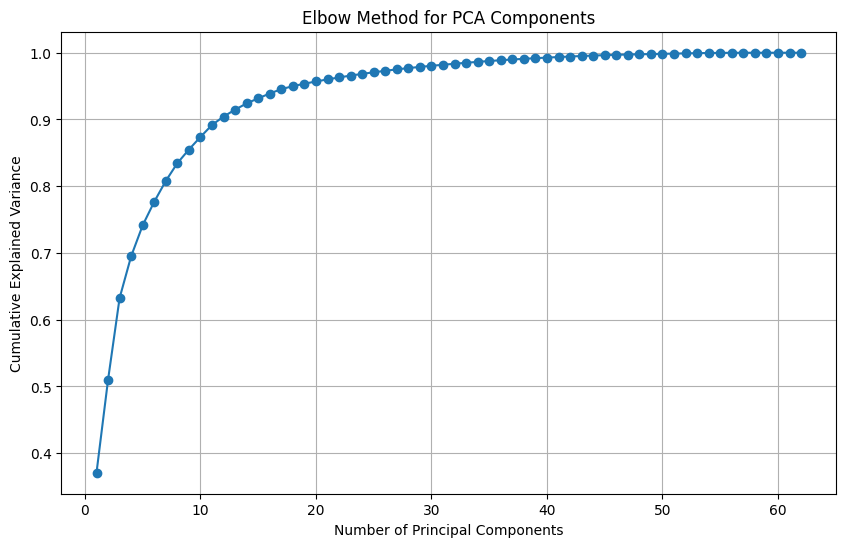

In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# X is your preprocessed dataframe
pca = PCA()
X_pca = pca.fit_transform(X)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Elbow plot
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA Components')
plt.grid(True)
plt.show()


In [101]:
# Example: choose components to capture 90% of variance
n_components_optimal = np.argmax(explained_variance >= 0.90) + 1
print(f"Optimal components for 90% variance: {n_components_optimal}")


Optimal components for 90% variance: 12


## Shape

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
X_reduced = pca.fit_transform(X)

print("Shape after PCA:", X_reduced.shape)


Shape after PCA: (18405, 12)


## PCA Projection of Players by Primary Position (2 PCA)

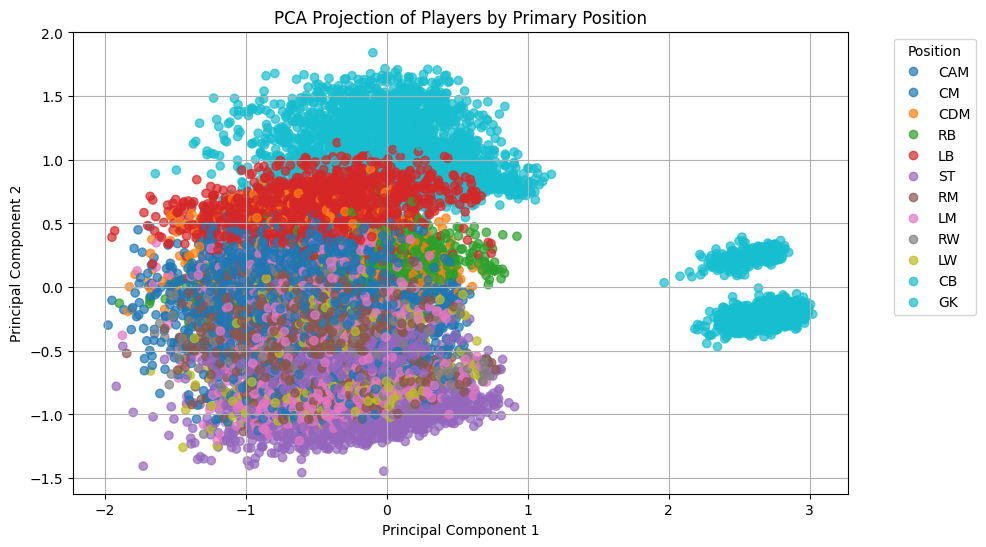

In [104]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------------------------------------
# 1️⃣ Keep a copy of primary positions before dropping
# ------------------------------------------------------
# If you didn’t save it earlier, recreate it:
player_positions_series = df[['player_id', 'player_positions']].copy()
player_positions_series['primary_position'] = player_positions_series['player_positions'].apply(lambda x: x.split(', ')[0])
player_positions_series = player_positions_series.set_index('player_id')


# ------------------------------------------------------
# 6️⃣ Plot first 2 principal components
# ------------------------------------------------------
# Map colors to player primary positions
positions = player_positions_series.loc[X.index, 'primary_position']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_reduced[:, 0], X_reduced[:, 1],
    c=pd.factorize(positions)[0],
    cmap='tab10',
    alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Players by Primary Position")
plt.grid(True)

# Add legend
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, pd.factorize(positions)[1], title="Position", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Players projected on first 3 Principal Components (3D)

/Users/sanahussain/.pyenv/versions/MoneyBaller/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


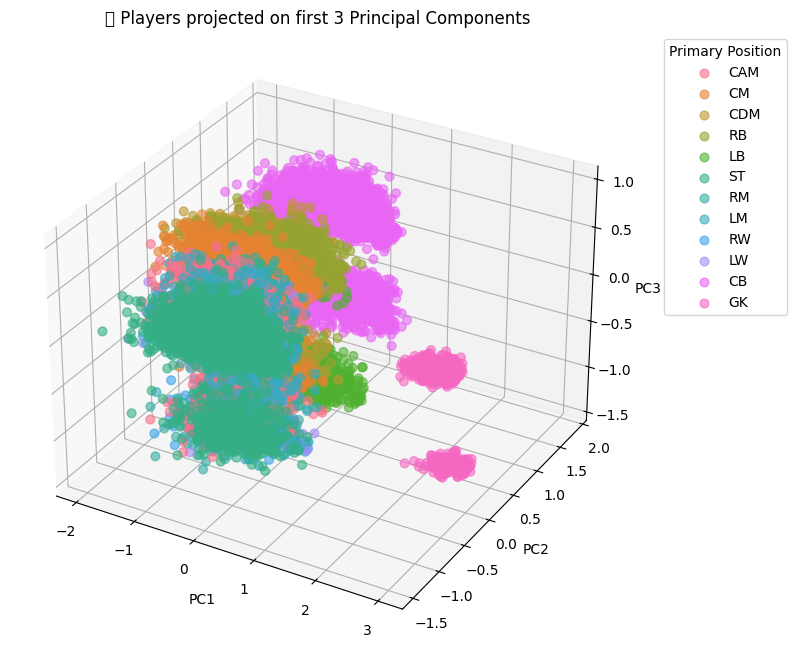

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

# -------------------------------
# 1️⃣  Make sure your features (X) and positions align
# -------------------------------

# player_features_df originally had primary_position before encoding
# If it's already dropped, reattach from the original df
player_positions = df[['player_id', 'player_positions']].copy()
player_positions['primary_position'] = player_positions['player_positions'].apply(lambda x: x.split(', ')[0])

# Merge positions with PCA data index
positions = player_positions.set_index('player_id').loc[X.index, 'primary_position']

# -------------------------------
# 2️⃣  Run PCA for 3 components
# -------------------------------
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(X)

# -------------------------------
# 3️⃣  Plot in 3D
# -------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_positions = positions.unique()
palette = sns.color_palette("husl", len(unique_positions))
color_map = dict(zip(unique_positions, palette))

for pos in unique_positions:
    mask = positions == pos
    ax.scatter(
        X_reduced_3d[mask, 0],
        X_reduced_3d[mask, 1],
        X_reduced_3d[mask, 2],
        label=pos,
        color=color_map[pos],
        alpha=0.6,
        s=40
    )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("🎮 Players projected on first 3 Principal Components")
ax.legend(title="Primary Position", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Top 10 features contributing to PC1, PC2, PC3

In [106]:
import pandas as pd
import numpy as np

# Get PCA loadings (how much each feature contributes to each PC)
loadings = pd.DataFrame(
    pca_3d.components_.T,  # transpose so features are rows
    columns=['PC1', 'PC2', 'PC3'],
    index=X.columns
)

# Sort features by their importance for each principal component
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)
top_features_pc3 = loadings['PC3'].abs().sort_values(ascending=False).head(10)

print("🔥 Top 10 features contributing to PC1:")
print(top_features_pc1)
print("\n⚡ Top 10 features contributing to PC2:")
print(top_features_pc2)
print("\n🎯 Top 10 features contributing to PC3:")
print(top_features_pc3)


🔥 Top 10 features contributing to PC1:
primary_position_GK      0.265267
dribbling                0.196649
skill_dribbling          0.184388
passing                  0.180855
mentality_positioning    0.177784
pace                     0.176891
skill_ball_control       0.174930
power_long_shots         0.174412
shooting                 0.170639
physic                   0.169107
Name: PC1, dtype: float64

⚡ Top 10 features contributing to PC2:
primary_position_CB            0.423116
primary_position_ST            0.275118
defending                      0.265032
defending_sliding_tackle       0.264001
defending_standing_tackle      0.257919
mentality_interceptions        0.251075
defending_marking_awareness    0.247369
preferred_foot_Right           0.232142
preferred_foot_Left            0.232142
shooting                       0.189039
Name: PC2, dtype: float64

🎯 Top 10 features contributing to PC3:
preferred_foot_Right           0.633441
preferred_foot_Left            0.633441
primary_p

## Top 10 Features Contributing to PC1 (Bar graph)

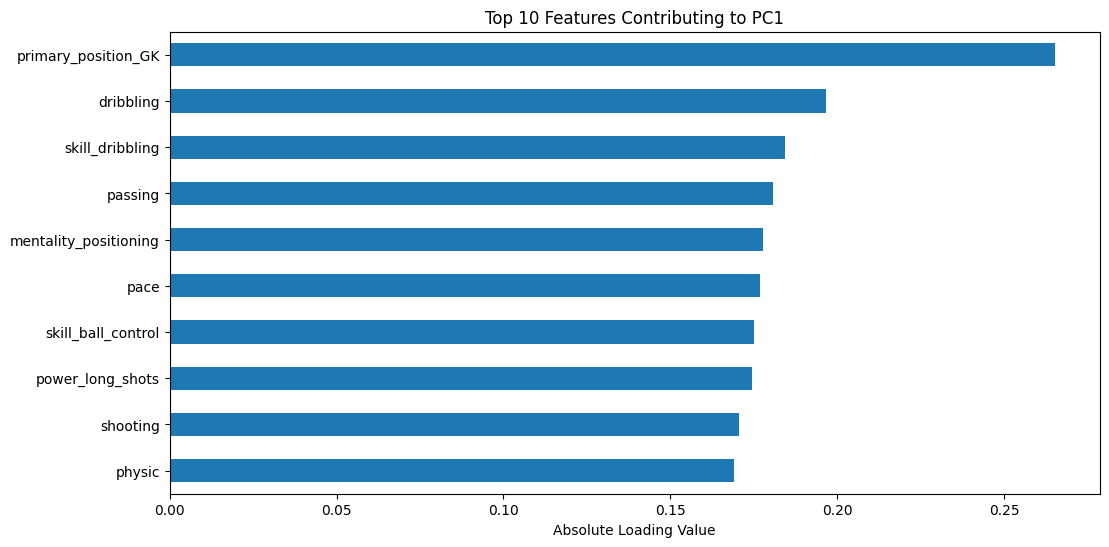

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_features_pc1.head(10).plot(kind='barh')
plt.title("Top 10 Features Contributing to PC1")
plt.xlabel("Absolute Loading Value")
plt.gca().invert_yaxis()
plt.show()


## PCA Loadings Heatmap (All 12 Components)

/var/folders/2m/r1v8b_g51z17xy3wlp9dyns80000gn/T/ipykernel_43540/1671838830.py:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sanahussain/.pyenv/versions/MoneyBaller/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


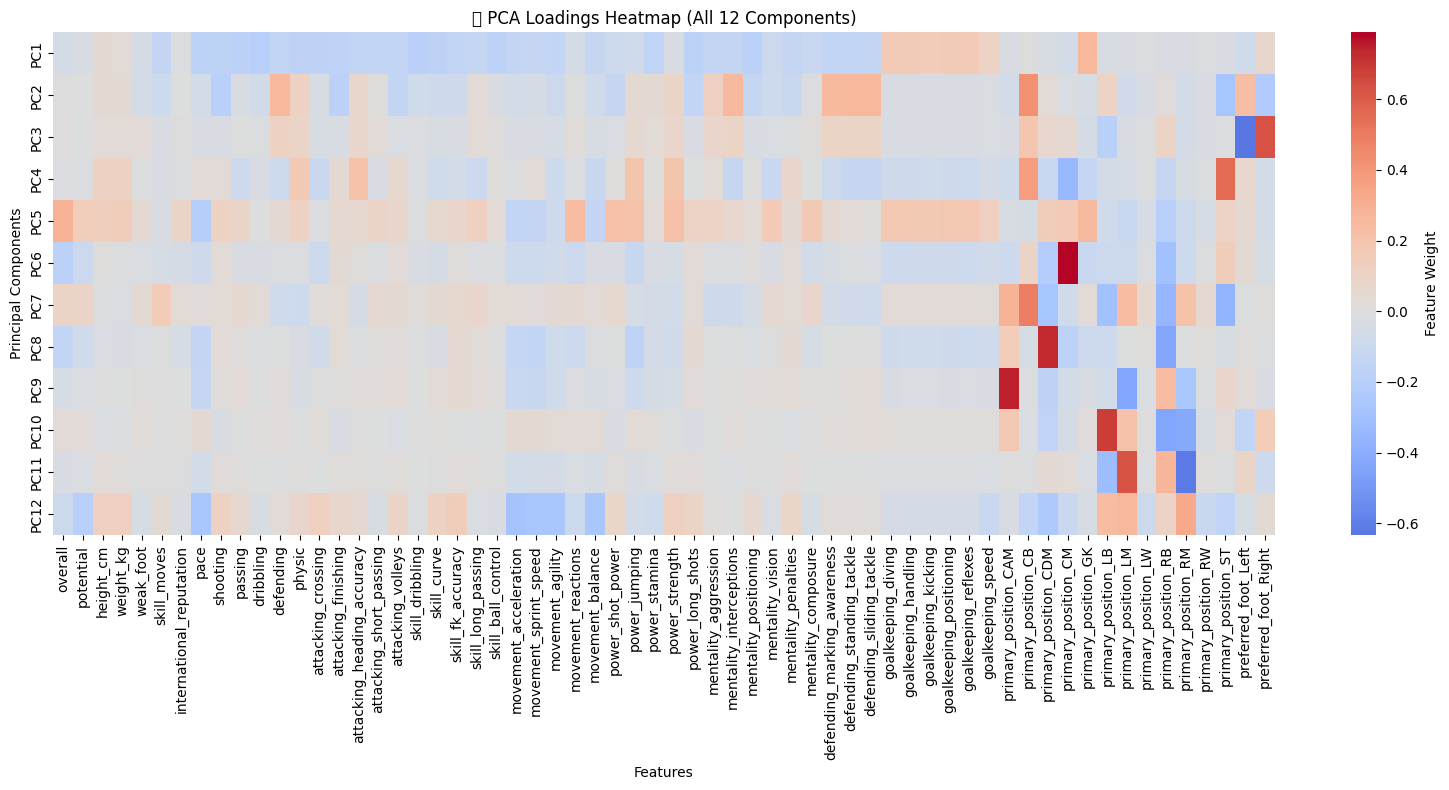

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame of all PCA loadings (for 12 components)
loadings_df = pd.DataFrame(
    pca.components_,  # pca here is your fitted PCA with n_components=12
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    loadings_df,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Feature Weight'},
)
plt.title("🔥 PCA Loadings Heatmap (All 12 Components)")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
